In [9]:
import pandas as pd

file_path = 'combined_stock_data_2008_2023.csv'
df = pd.read_csv(file_path)
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,^NYA,2008-08-01,8438.709961,8452.009766,8356.429688,8379.150391,8379.150391,4.684870e+09
1,^IXIC,2008-08-01,2326.830078,2328.949951,2286.409912,2310.959961,2310.959961,2.312140e+09
2,^FTSE,2008-08-01,5411.899902,5411.899902,5321.299805,5354.700195,5354.700195,1.341947e+09
3,^NSEI,2008-08-01,4331.600098,4422.950195,4235.700195,4413.549805,4413.549805,0.000000e+00
4,^BSESN,2008-08-01,14064.259766,14682.330078,14032.870117,14656.690430,14656.690430,4.020000e+04
...,...,...,...,...,...,...,...,...
44895,^N100,2023-07-28,1400.680054,1403.500000,1391.239990,1400.609985,1400.609985,4.174905e+08
44896,^DJI,2023-07-28,35443.488281,35565.511719,35355.148438,35459.289062,35459.289062,3.690000e+08
44897,^GSPC,2023-07-28,4565.750000,4590.160156,4564.009766,4582.229980,4582.229980,3.981010e+09
44898,GC=F,2023-07-28,1945.500000,1962.199951,1944.199951,1960.400024,1960.400024,1.942530e+05


In [10]:
print(df.head())


   Ticker        Date          Open          High           Low         Close  \
0    ^NYA  2008-08-01   8438.709961   8452.009766   8356.429688   8379.150391   
1   ^IXIC  2008-08-01   2326.830078   2328.949951   2286.409912   2310.959961   
2   ^FTSE  2008-08-01   5411.899902   5411.899902   5321.299805   5354.700195   
3   ^NSEI  2008-08-01   4331.600098   4422.950195   4235.700195   4413.549805   
4  ^BSESN  2008-08-01  14064.259766  14682.330078  14032.870117  14656.690430   

      Adj Close        Volume  
0   8379.150391  4.684870e+09  
1   2310.959961  2.312140e+09  
2   5354.700195  1.341947e+09  
3   4413.549805  0.000000e+00  
4  14656.690430  4.020000e+04  


In [11]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44900 entries, 0 to 44899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     44900 non-null  object 
 1   Date       44900 non-null  object 
 2   Open       44900 non-null  float64
 3   High       44900 non-null  float64
 4   Low        44900 non-null  float64
 5   Close      44900 non-null  float64
 6   Adj Close  44900 non-null  float64
 7   Volume     44900 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.7+ MB
None


In [12]:
print(df.describe())


               Open          High           Low         Close     Adj Close  \
count  44900.000000  44900.000000  44900.000000  44900.000000  44900.000000   
mean    9040.363609   9092.173402   8980.577950   9038.188030   9038.188030   
std    10561.047429  10613.438737  10495.425110  10555.638993  10555.638993   
min      -14.000000     13.690000    -40.320000    -37.630001    -37.630001   
25%     1526.315033   1541.549988   1513.800049   1526.450012   1526.450012   
50%     5506.500000   5551.800049   5460.949951   5511.649902   5511.649902   
75%    12574.752930  12641.117676  12488.155273  12577.892578  12577.892578   
max    67074.343750  67619.171875  66831.382812  67571.898438  67571.898438   

             Volume  
count  4.490000e+04  
mean   1.035698e+09  
std    1.674264e+09  
min    0.000000e+00  
25%    1.601000e+05  
50%    1.380000e+08  
75%    1.545521e+09  
max    1.162119e+10  


In [13]:
# Check for missing values
print(df.isnull().sum())


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [14]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Non-Numeric Columns:", non_numeric_cols)


Numeric Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Non-Numeric Columns: Index(['Ticker', 'Date'], dtype='object')


In [15]:
# Fill missing values in numeric columns with their mean
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [16]:
# Fill missing values in non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [17]:
# Verify that there are no more missing values
print(df.isnull().sum())


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [18]:
df.dropna(inplace=True)


In [19]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


In [20]:
# Check a few values from the 'Date' column
print(df['Date'].head())


0    2008-08-01
1    2008-08-01
2    2008-08-01
3    2008-08-01
4    2008-08-01
Name: Date, dtype: object


In [21]:
# Convert 'Date' to datetime with format '%Y-%m-%d'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [22]:
# Check for invalid dates
print(df['Date'].isna().sum())

# Optionally, display rows with invalid dates
print(df[df['Date'].isna()])


0
Empty DataFrame
Columns: [Ticker, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [23]:
df.dropna(subset=['Date'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the first few rows after conversion
print(df.head())

   Ticker       Date          Open          High           Low         Close  \
0    ^NYA 2008-08-01   8438.709961   8452.009766   8356.429688   8379.150391   
1   ^IXIC 2008-08-01   2326.830078   2328.949951   2286.409912   2310.959961   
2   ^FTSE 2008-08-01   5411.899902   5411.899902   5321.299805   5354.700195   
3   ^NSEI 2008-08-01   4331.600098   4422.950195   4235.700195   4413.549805   
4  ^BSESN 2008-08-01  14064.259766  14682.330078  14032.870117  14656.690430   

      Adj Close        Volume  
0   8379.150391  4.684870e+09  
1   2310.959961  2.312140e+09  
2   5354.700195  1.341947e+09  
3   4413.549805  0.000000e+00  
4  14656.690430  4.020000e+04  


In [24]:
# Example: Extract year, month, and day from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


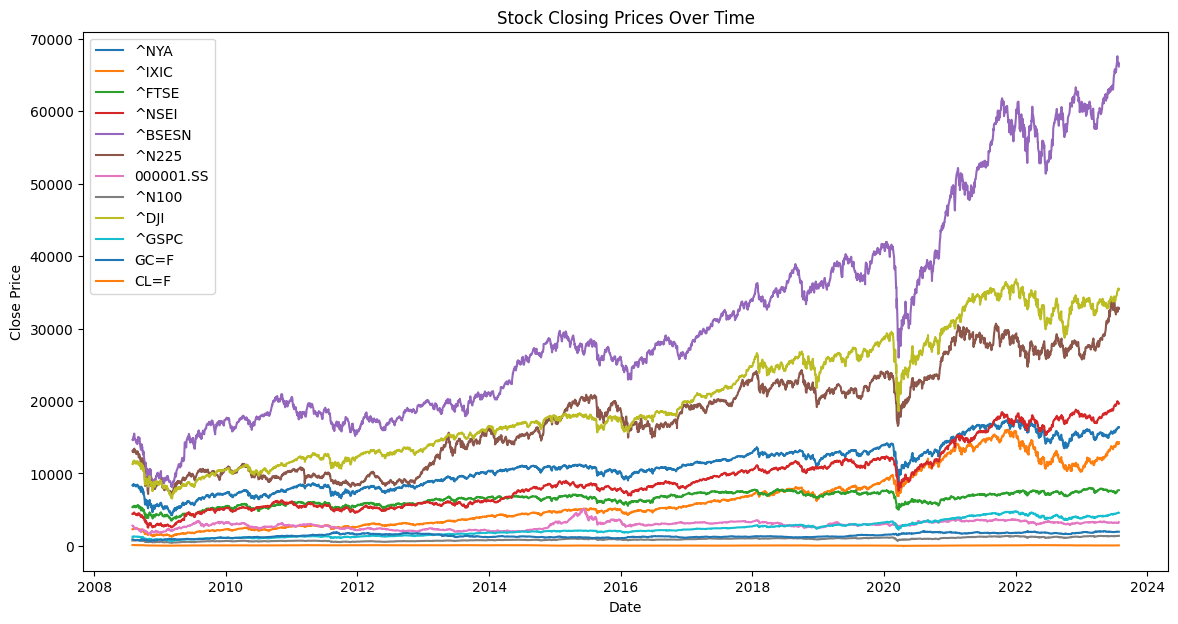

In [25]:
import matplotlib.pyplot as plt

# Example: Plot Closing Prices
plt.figure(figsize=(14, 7))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Stock Closing Prices Over Time')
plt.show()


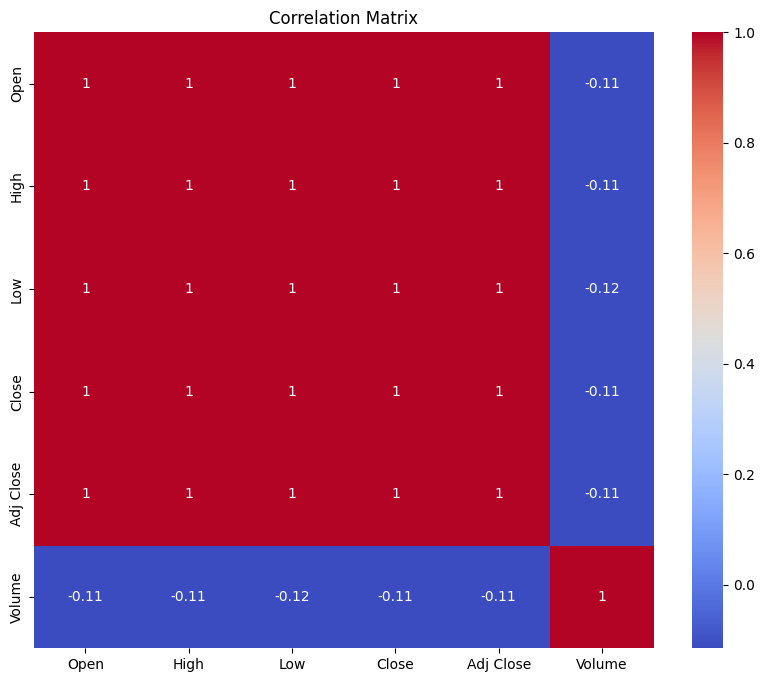

In [26]:
import seaborn as sns

# Example: Plot correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [27]:
# Example: Create sequences for LSTM
import numpy as np
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Convert dataframe to numpy array for LSTM
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
seq_length = 60  # Example sequence length
X, y = create_sequences(data, seq_length)


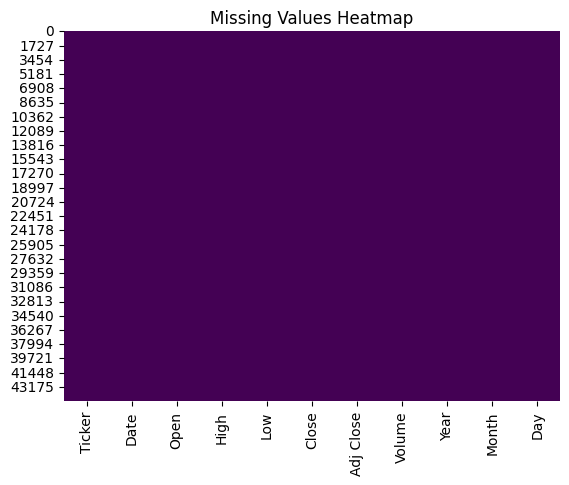

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


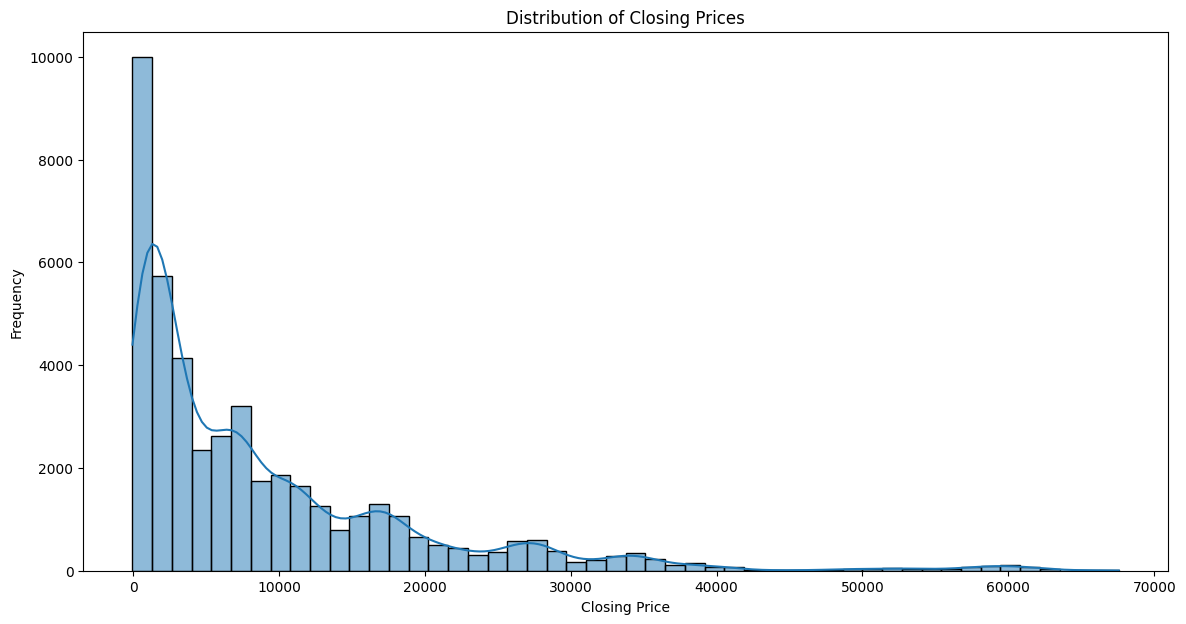

In [29]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


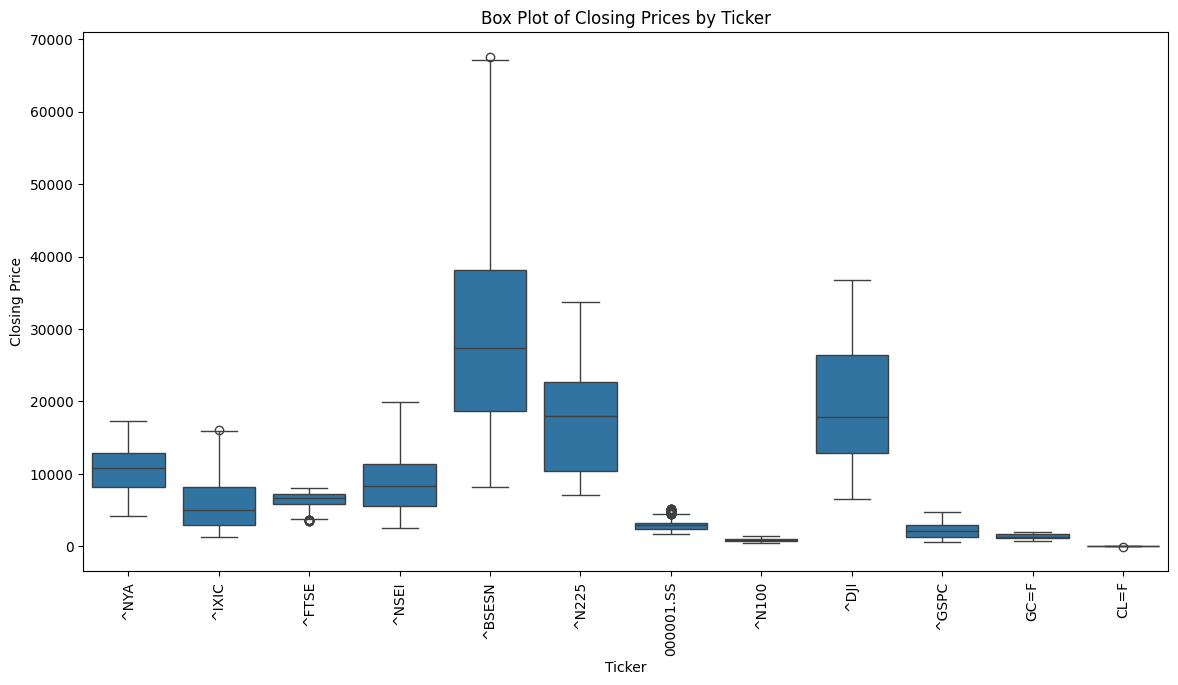

In [30]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Ticker', y='Close', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Closing Prices by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Closing Price')
plt.show()



In [31]:
# Convert 'Ticker' to categorical codes
df['Ticker'] = df['Ticker'].astype('category').cat.codes
df['Ticker']

0        11
1         7
2         5
3        10
4         3
         ..
44895     8
44896     4
44897     6
44898     2
44899     1
Name: Ticker, Length: 44900, dtype: int8

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])


In [33]:
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract Year and create a 'Year' column
df['Year'] = df['Date'].dt.year

# Group by 'Year' and 'Ticker', then calculate profit
annual_profit = df.groupby(['Year', 'Ticker']).agg({
    'Close': ['first', 'last']
}).reset_index()

# Calculate profit as the difference between last and first closing prices
annual_profit.columns = ['Year', 'Ticker', 'Close_First', 'Close_Last']
annual_profit['Profit'] = annual_profit['Close_Last'] - annual_profit['Close_First']

# Find the company with the maximum and minimum profit for each year
max_profit = annual_profit.loc[annual_profit.groupby('Year')['Profit'].idxmax()]
min_profit = annual_profit.loc[annual_profit.groupby('Year')['Profit'].idxmin()]

print(max_profit[['Year', 'Ticker', 'Profit']])
print(min_profit[['Year', 'Ticker', 'Profit']])


     Year  Ticker    Profit
2    2008       2 -0.000376
15   2009       3  0.111029
27   2010       3  0.043638
40   2011       4  0.008088
51   2012       3  0.051581
69   2013       9  0.082876
75   2014       3  0.094054
93   2015       9  0.024035
100  2016       4  0.038658
111  2017       3  0.110360
123  2018       3  0.033362
135  2019       3  0.079312
147  2020       3  0.090589
159  2021       3  0.153600
171  2022       3  0.024516
189  2023       9  0.104162
     Year  Ticker    Profit
3    2008       3 -0.074093
13   2009       1  0.000488
24   2010       0 -0.006444
39   2011       3 -0.075524
49   2012       1 -0.000165
62   2013       2 -0.007188
77   2014       5 -0.002245
87   2015       3 -0.026185
96   2016       0 -0.002849
109  2017       1  0.000120
129  2018       9 -0.051643
133  2019       1  0.000215
149  2020       5 -0.016918
158  2021       2 -0.001733
175  2022       7 -0.079372
181  2023       1  0.000054


In [34]:
df["Ticker"].value_counts()

Ticker
8     3835
5     3784
11    3773
7     3773
4     3773
6     3773
1     3771
2     3769
3     3676
10    3669
9     3664
0     3640
Name: count, dtype: int64

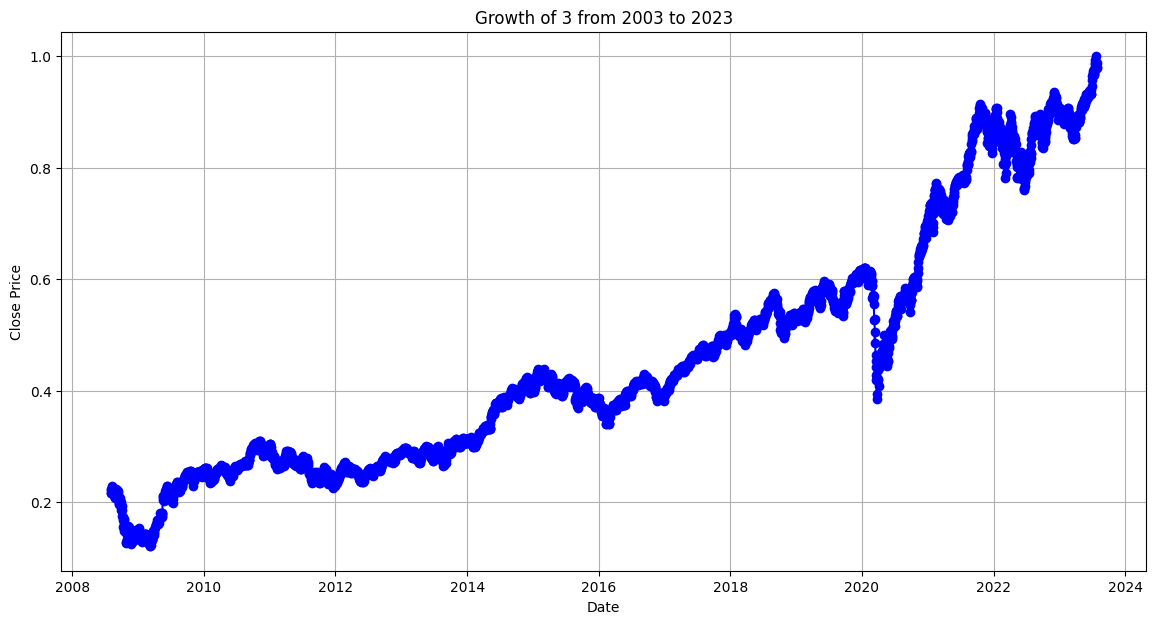

In [35]:
# Filter data for the selected company
selected_ticker = 3  # Example ticker symbol
company_data = df[df['Ticker'] == selected_ticker]

# Filter for the years 2003 to 2023
company_data = company_data[(company_data['Year'] >= 2003) & (company_data['Year'] <= 2023)]

# Plot the growth of the company
plt.figure(figsize=(14, 7))
plt.plot(company_data['Date'], company_data['Close'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Growth of {selected_ticker} from 2003 to 2023')
plt.grid(True)
plt.show()


In [36]:
import pandas as pd

# Load the dataset
file_path = 'combined_stock_data_2008_2023.csv'
df2 = pd.read_csv(file_path)

# Convert 'Ticker' to categorical codes
df2['Ticker'] = df2['Ticker'].astype('category')

# Create a mapping of codes to tickers
code_to_ticker = df2['Ticker'].cat.categories.to_series().reset_index()
code_to_ticker.columns = ['Code', 'Ticker']

print("Code to Ticker Mapping:")
print(code_to_ticker)


Code to Ticker Mapping:
         Code     Ticker
0   000001.SS  000001.SS
1        CL=F       CL=F
2        GC=F       GC=F
3      ^BSESN     ^BSESN
4        ^DJI       ^DJI
5       ^FTSE      ^FTSE
6       ^GSPC      ^GSPC
7       ^IXIC      ^IXIC
8       ^N100      ^N100
9       ^N225      ^N225
10      ^NSEI      ^NSEI
11       ^NYA       ^NYA


In [37]:
unique_tickers = df['Ticker'].unique()
print(unique_tickers)


[11  7  5 10  3  9  0  8  4  6  2  1]


In [38]:
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])  # Predict the next value
    return np.array(X), np.array(y)

stock_prices = df['Adj Close'].values.reshape(-1, 1)

seq_length = 60

X, y = create_sequences(stock_prices, seq_length)

split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((35872, 60, 1), (8968, 60, 1), (35872, 1), (8968, 1))

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=64, epochs=10)


C:\Users\saite\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 73s 112ms/step - loss: 0.0129
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 83s 115ms/step - loss: 0.0095
Epoch 3/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 64s 114ms/step - loss: 0.0060
Epoch 4/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 65s 115ms/step - loss: 0.0044
Epoch 5/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 64s 113ms/step - loss: 0.0033
Epoch 6/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 63s 112ms/step - loss: 0.0030
Epoch 7/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 63s 112ms/step - loss: 0.0026
Epoch 8/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 64s 114ms/step - loss: 0.0025
Epoch 9/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 65s 115ms/step - loss: 0.0023
Epoch 10/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 65s 115ms/step - loss: 0.0021


In [40]:
import pandas as pd

# Load the provided stock data file
file_path = 'combined_stock_data_2008_2023.csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
stock_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,^NYA,2008-08-01,8438.709961,8452.009766,8356.429688,8379.150391,8379.150391,4.684870e+09
1,^IXIC,2008-08-01,2326.830078,2328.949951,2286.409912,2310.959961,2310.959961,2.312140e+09
2,^FTSE,2008-08-01,5411.899902,5411.899902,5321.299805,5354.700195,5354.700195,1.341947e+09
3,^NSEI,2008-08-01,4331.600098,4422.950195,4235.700195,4413.549805,4413.549805,0.000000e+00
4,^BSESN,2008-08-01,14064.259766,14682.330078,14032.870117,14656.690430,14656.690430,4.020000e+04


In [41]:
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44900 entries, 0 to 44899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     44900 non-null  object 
 1   Date       44900 non-null  object 
 2   Open       44900 non-null  float64
 3   High       44900 non-null  float64
 4   Low        44900 non-null  float64
 5   Close      44900 non-null  float64
 6   Adj Close  44900 non-null  float64
 7   Volume     44900 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


In [42]:
# Convert 'Date' to datetime and sort the data by date
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.sort_values(by='Date', inplace=True)

# Select a specific ticker for analysis, e.g., '^IXIC' (Nasdaq Composite Index)
ticker_data = stock_data[stock_data['Ticker'] == '^IXIC']

# Reset the index for easier manipulation
ticker_data = ticker_data.reset_index(drop=True)

# Display the first few rows of the preprocessed data
ticker_data.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,^IXIC,2008-08-01,2326.830078,2328.949951,2286.409912,2310.959961,2310.959961,2.312140e+09
1,^IXIC,2008-08-04,2309.750000,2309.750000,2280.929932,2285.560059,2285.560059,2.010200e+09
2,^IXIC,2008-08-05,2308.139893,2349.830078,2303.629883,2349.830078,2349.830078,2.324730e+09
3,^IXIC,2008-08-06,2349.169922,2385.770020,2333.530029,2378.370117,2378.370117,2.228710e+09
4,^IXIC,2008-08-07,2362.790039,2386.439941,2351.320068,2355.729980,2355.729980,2.189120e+09


In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use only the 'Close' price for prediction
close_prices = ticker_data[['Close']].values

# Scale the 'Close' prices between 0 and 1 for better performance with LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Function to create a dataset with lookback period for LSTM input
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i - look_back:i, 0])  # Use 'look_back' days to predict the next price
        y.append(dataset[i, 0])  # The next day's price
    return np.array(X), np.array(y)

# Set look_back period (number of previous days used for prediction)
look_back = 60
X, y = create_dataset(scaled_close_prices, look_back)

# Reshape X to be [samples, time steps, features] for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2970, 60, 1), (743, 60, 1), (2970,), (743,))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add the LSTM layers with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer to predict the next price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Summarize the model
model.summary()


C:\Users\saite\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - loss: 4.1967e-04 - val_loss: 0.0014
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0042 - val_loss: 6.8198e-04
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 6.4890e-04 - val_loss: 0.0032
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 2.4620e-04 - val_loss: 0.0015
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 2.6757e-04 - val_loss: 6.4273e-04
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 3.5580e-04 - val_loss: 0.0031
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 3.3730e-04 - val_loss: 9.2674e-04
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 6.5009e-04 - val_loss: 0.0041
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0035 - val_loss: 5.8884e-04
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 3.0696e-04 - val_loss: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [45]:
import numpy as np
import pandas as pd
from datetime import timedelta

# Function to predict future stock prices and identify buy/sell dates
# Function to predict future stock prices and identify buy/sell dates
def predict_buy_sell_dates(model, recent_data, scaler, future_days=30):
    # Get the last 60 days of data to start prediction
    last_60_days = recent_data[-60:].values
    last_60_days_scaled = scaler.transform(last_60_days)

    # Reshape the data for the LSTM model
    X_input = np.reshape(last_60_days_scaled, (1, last_60_days_scaled.shape[0], 1))

    # Predict future prices for the specified number of days
    predicted_prices = []
    for _ in range(future_days):
        predicted_price = model.predict(X_input)
        predicted_prices.append(predicted_price[0][0])

        # Update the input data with the predicted price for the next iteration
        X_input = np.append(X_input[:, 1:, :], np.reshape(predicted_price, (1, 1, 1)), axis=1)
    
    # Inverse transform the predictions back to original scale
    predicted_prices = np.array(predicted_prices).reshape(-1, 1)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices


# Function to find the buy (low) and sell (high) dates from predicted prices
def find_buy_sell_dates(predicted_prices, current_date):
    future_dates = [current_date + timedelta(days=i) for i in range(len(predicted_prices))]

    # Find the index of the minimum price (buy date) and maximum price (sell date)
    buy_index = np.argmin(predicted_prices)
    sell_index = np.argmax(predicted_prices)

    # Return the dates and prices for buy and sell
    buy_date, sell_date = future_dates[buy_index], future_dates[sell_index]
    buy_price, sell_price = predicted_prices[buy_index][0], predicted_prices[sell_index][0]

    return buy_date, buy_price, sell_date, sell_price

# Example usage:
# Assume we have a current date and recent data for the stock (e.g., 'ticker_data')

# Get the current date (you can modify this to any specific date)
current_date = pd.to_datetime("2023-09-23")

# Predict prices for the next 30 days
predicted_prices = predict_buy_sell_dates(model, ticker_data[['Close']], scaler, future_days=30)

# Find the optimal buy and sell dates
buy_date, buy_price, sell_date, sell_price = find_buy_sell_dates(predicted_prices, current_date)

# Output the results
print(f"Buy on {buy_date.date()} at price: {buy_price}")
print(f"Sell on {sell_date.date()} at price: {sell_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━

In [46]:
# Function to predict future stock prices and identify buy/sell dates for a specific ticker
def predict_buy_sell_for_ticker(model, data, ticker, scaler, current_date, future_days=30):
    # Filter data for the specific ticker
    ticker_data = data[data['Ticker'] == ticker]
    
    # Sort by date to ensure chronological order
    ticker_data = ticker_data.sort_values(by='Date')

    # Get the recent 60 days of data for the specified ticker
    recent_data = ticker_data[ticker_data['Date'] <= current_date].tail(60)
    
    if len(recent_data) < 60:
        raise ValueError(f"Not enough data to make predictions for {ticker}. At least 60 days of data are required.")
    
    # Predict future prices using the last 60 days of 'Close' prices
    predicted_prices = predict_buy_sell_dates(model, recent_data[['Close']], scaler, future_days=future_days)

    # Find the optimal buy and sell dates
    buy_date, buy_price, sell_date, sell_price = find_buy_sell_dates(predicted_prices, current_date)
    
    return buy_date, buy_price, sell_date, sell_price

# Example usage:
# Assume the current date is 2023-09-23 and we want to predict for the NASDAQ index (^IXIC)

current_date = pd.to_datetime("2023-09-23")
ticker = "^IXIC"

# Predict buy and sell dates for the given ticker
buy_date, buy_price, sell_date, sell_price = predict_buy_sell_for_ticker(model, stock_data, ticker, scaler, current_date)

# Output the results
print(f"For {ticker}:")
print(f"Buy on {buy_date.date()} at price: {buy_price}")
print(f"Sell on {sell_date.date()} at price: {sell_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

In [47]:
current_date = pd.to_datetime("2024-10-23")
ticker = "^NYA"

# Predict buy and sell dates for the given ticker
buy_date, buy_price, sell_date, sell_price = predict_buy_sell_for_ticker(model, stock_data, ticker, scaler, current_date)

# Output the results
print(f"For {ticker}:")
print(f"Buy on {buy_date.date()} at price: {buy_price}")
print(f"Sell on {sell_date.date()} at price: {sell_price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

In [48]:
import matplotlib.pyplot as plt

def predict_daily(model, recent_data, scaler, days=30):
    # Get the last 60 days of data
    last_60_days = recent_data[-60:].values
    last_60_days_scaled = scaler.transform(last_60_days)

    # Reshape for LSTM input
    X_input = np.reshape(last_60_days_scaled, (1, last_60_days_scaled.shape[0], 1))

    # Store predicted prices
    predicted_prices = []

    for day in range(days):
        predicted_price = model.predict(X_input)
        predicted_prices.append(predicted_price[0][0])

        # Update input with the new predicted price for the next iteration
        X_input = np.append(X_input[:, 1:, :], np.reshape(predicted_price, (1, 1, 1)), axis=1)

    predicted_prices = np.array(predicted_prices).reshape(-1, 1)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━

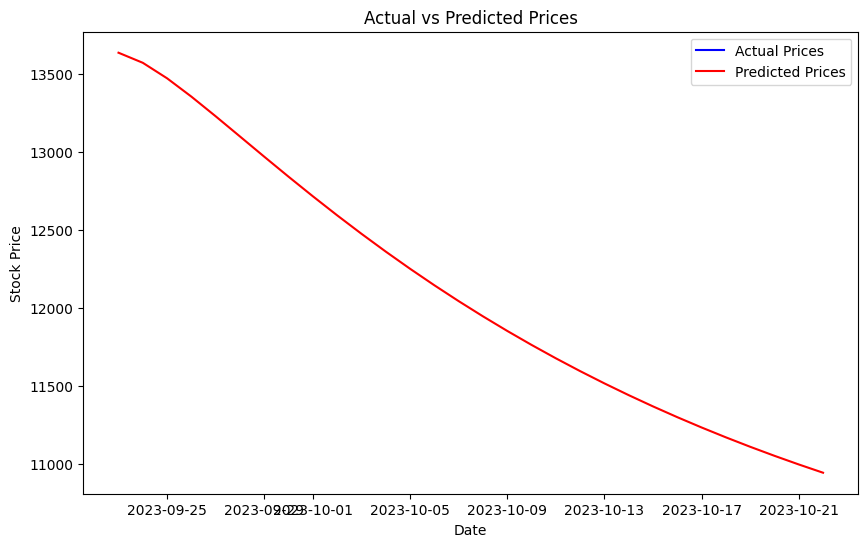

In [49]:
def plot_predictions(actual_prices, predicted_prices, current_date):
    future_dates = [current_date + timedelta(days=i) for i in range(len(predicted_prices))]
    
    plt.figure(figsize=(10, 6))
    plt.plot(actual_prices, color='blue', label='Actual Prices')
    plt.plot(future_dates, predicted_prices, color='red', label='Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Example Usage
# Predict next 30 days
current_date = pd.to_datetime("2023-09-23")
predicted_prices = predict_daily(model, ticker_data[['Close']], scaler, days=30)

# Assuming we have actual prices for the next 30 days (use real validation data)
# This is for illustration; replace with actual validation data
actual_prices = ticker_data[ticker_data['Date'] > current_date]['Close'].head(30).values

# Plot the predictions vs actual prices
plot_predictions(actual_prices, predicted_prices, current_date)


In [50]:
# Check if actual prices exist after 2023-09-23
current_date = pd.to_datetime("2023-09-23")
actual_prices = ticker_data[ticker_data['Date'] > current_date]['Close'].head(30).values

# Verify the length of actual prices
print(f"Actual prices length: {len(actual_prices)}")


Actual prices length: 0


In [51]:
# Check the last date available in your dataset
print(f"Last date in the dataset: {ticker_data['Date'].max()}")


Last date in the dataset: 2023-07-28 00:00:00


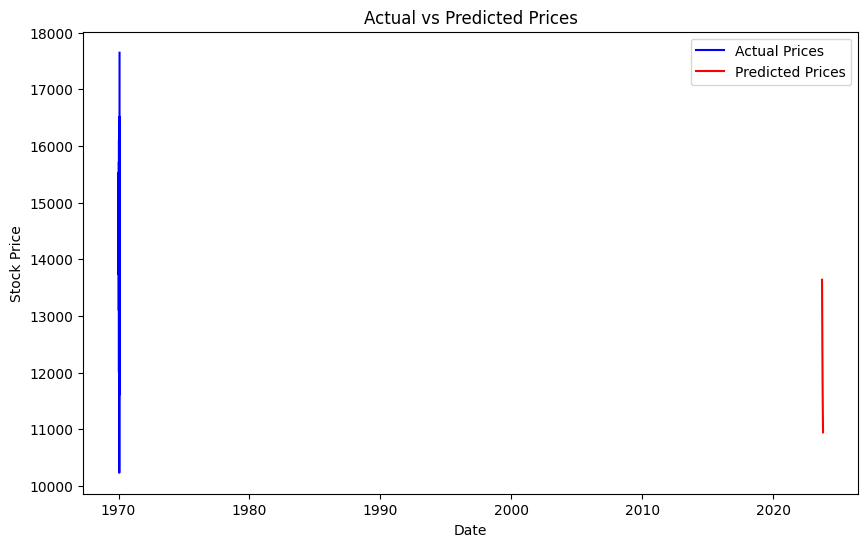

In [52]:
import numpy as np

# Get the last available price in your dataset
last_price = ticker_data[ticker_data['Date'] == '2023-07-28']['Close'].values[0]

# Simulate future actual prices for 30 days
simulated_actual_prices = [last_price + np.random.normal(0, 100) * i for i in range(1, 31)]

# Plot with simulated actual prices
plot_predictions(simulated_actual_prices, predicted_prices, current_date)


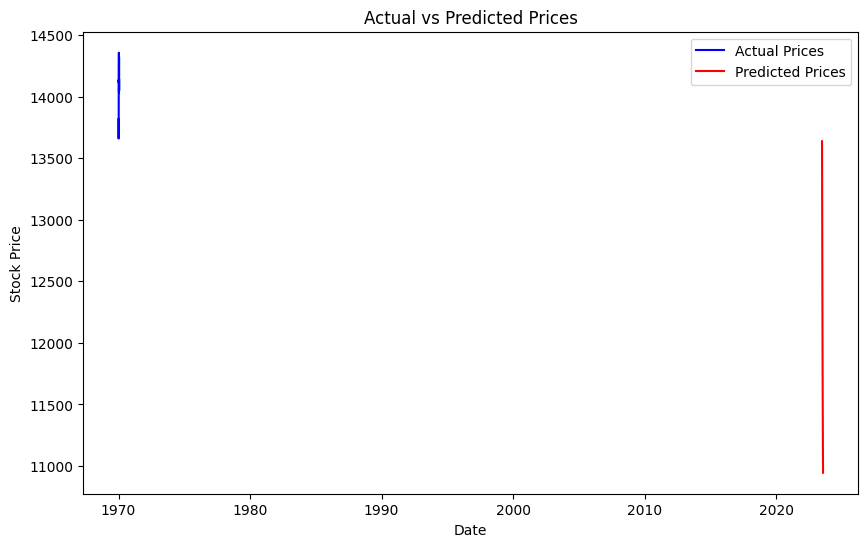

In [53]:
# Train on data before 2023-06-30 and test on data between 2023-07-01 and 2023-07-28
train_data = ticker_data[ticker_data['Date'] <= '2023-06-30']
test_data = ticker_data[(ticker_data['Date'] > '2023-06-30') & (ticker_data['Date'] <= '2023-07-28')]

# Use test_data['Close'] as actual prices for evaluation
actual_prices = test_data['Close'].values

# Plot predictions for the test period
plot_predictions(actual_prices, predicted_prices, pd.to_datetime('2023-07-01'))


In [54]:
# !pip install yfinance


In [55]:
import yfinance as yf
import pandas as pd

# Define the ticker and the date range
ticker = "^IXIC"  # NASDAQ index (adjust this to the desired stock symbol)
start_date = "2023-07-28"
end_date = "2024-02-28"

# Fetch data from Yahoo Finance
actual_data = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Close' prices
actual_prices = actual_data['Close']

# Check the data
print(actual_prices)


[*********************100%***********************]  1 of 1 completed

Date
2023-07-28    14316.660156
2023-07-31    14346.019531
2023-08-01    14283.910156
2023-08-02    13973.450195
2023-08-03    13959.719727
                  ...     
2024-02-21    15580.870117
2024-02-22    16041.620117
2024-02-23    15996.820312
2024-02-26    15976.250000
2024-02-27    16035.299805
Name: Close, Length: 147, dtype: float64


In [56]:
print(actual_data)

                    Open          High           Low         Close  \
Date                                                                 
2023-07-28  14199.830078  14344.349609  14188.099609  14316.660156   
2023-07-31  14337.900391  14370.910156  14292.750000  14346.019531   
2023-08-01  14274.929688  14309.209961  14215.639648  14283.910156   
2023-08-02  14132.730469  14133.849609  13914.809570  13973.450195   
2023-08-03  13899.759766  14032.280273  13881.349609  13959.719727   
...                  ...           ...           ...           ...   
2024-02-21  15532.120117  15583.679688  15451.650391  15580.870117   
2024-02-22  15904.480469  16061.820312  15869.240234  16041.620117   
2024-02-23  16094.799805  16134.219727  15954.500000  15996.820312   
2024-02-26  16014.450195  16054.900391  15973.900391  15976.250000   
2024-02-27  16013.980469  16046.099609  15940.509766  16035.299805   

               Adj Close      Volume  
Date                                  
2023-07-28 

In [57]:
import numpy as np
import pandas as pd

# Assume we have 150 trading days between 2023-07-28 and 2024-02-28
future_days = 215  # Adjust this based on the number of actual days if needed

# Predict prices using the trained model (ensure this returns the correct shape)
predicted_prices = predict_buy_sell_dates(model, ticker_data[['Close']], scaler, future_days=future_days)

# Ensure predicted_prices is a 1-dimensional array
predicted_prices = np.array(predicted_prices).flatten()

# Generate dates for the predicted prices
predicted_dates = pd.date_range(start="2023-07-29", periods=future_days)

# Create a DataFrame with the predicted prices
predicted_prices_df = pd.DataFrame({'Date': predicted_dates, 'Predicted Prices': predicted_prices})

# Check the predictions
print(predicted_prices_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━

In [58]:
# Convert the Date column to datetime format
actual_prices_df['Date'] = pd.to_datetime(actual_prices_df['Date'])
predicted_prices_df['Date'] = pd.to_datetime(predicted_prices_df['Date'])


In [59]:
actual_prices_df

,Date,Actual Prices
0,2023-07-28,14316.660156
1,2023-07-31,14346.019531
2,2023-08-01,14283.910156
3,2023-08-02,13973.450195
4,2023-08-03,13959.719727
...,...,...
142,2024-02-21,15580.870117
143,2024-02-22,16041.620117
144,2024-02-23,15996.820312
145,2024-02-26,15976.250000


In [60]:
predicted_prices_df

,Date,Predicted Prices
0,2023-07-29,13638.595703
1,2023-07-30,13573.962891
2,2023-07-31,13474.450195
3,2023-08-01,13356.975586
4,2023-08-02,13230.876953
...,...,...
210,2024-02-24,9782.798828
211,2024-02-25,9782.783203
212,2024-02-26,9782.769531
213,2024-02-27,9782.756836


In [61]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker and the date range
ticker = "^IXIC"  # NASDAQ index (adjust this to the desired stock symbol)
start_date = "2023-07-28"
end_date = "2024-02-28"

# Fetch data from Yahoo Finance
actual_data = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Close' prices
actual_prices = actual_data['Close']

# Convert actual prices to a DataFrame
actual_prices_df = actual_prices.reset_index()
actual_prices_df.columns = ['Date', 'Actual Prices']  # Renaming columns

# Check the actual prices data
print("Actual Prices DataFrame:")
print(actual_prices_df)

# Predict prices using the trained model
# Here, we will determine the number of days in the actual prices DataFrame
num_days = len(actual_prices_df)

# Predict prices using the trained model
predicted_prices = predict_buy_sell_dates(model, ticker_data[['Close']], scaler, future_days=num_days)

# Ensure predicted_prices is a 1-dimensional array
predicted_prices = np.array(predicted_prices).flatten()

# Generate dates for the predicted prices covering the same range as actual prices
predicted_dates = pd.date_range(start=start_date, end=end_date, periods=num_days)

# Create a DataFrame with the predicted prices
predicted_prices_df = pd.DataFrame({'Date': predicted_dates, 'Predicted Prices': predicted_prices})

# Check the predictions DataFrame
print("Predicted Prices DataFrame:")
print(predicted_prices_df)

# Now, merge both DataFrames
merged_df = pd.merge(actual_prices_df, predicted_prices_df, on='Date', how='outer')

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df)


[*********************100%***********************]  1 of 1 completed

Actual Prices DataFrame:
          Date  Actual Prices
0   2023-07-28   14316.660156
1   2023-07-31   14346.019531
2   2023-08-01   14283.910156
3   2023-08-02   13973.450195
4   2023-08-03   13959.719727
..         ...            ...
142 2024-02-21   15580.870117
143 2024-02-22   16041.620117
144 2024-02-23   15996.820312
145 2024-02-26   15976.250000
146 2024-02-27   16035.299805

[147 rows x 2 columns]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

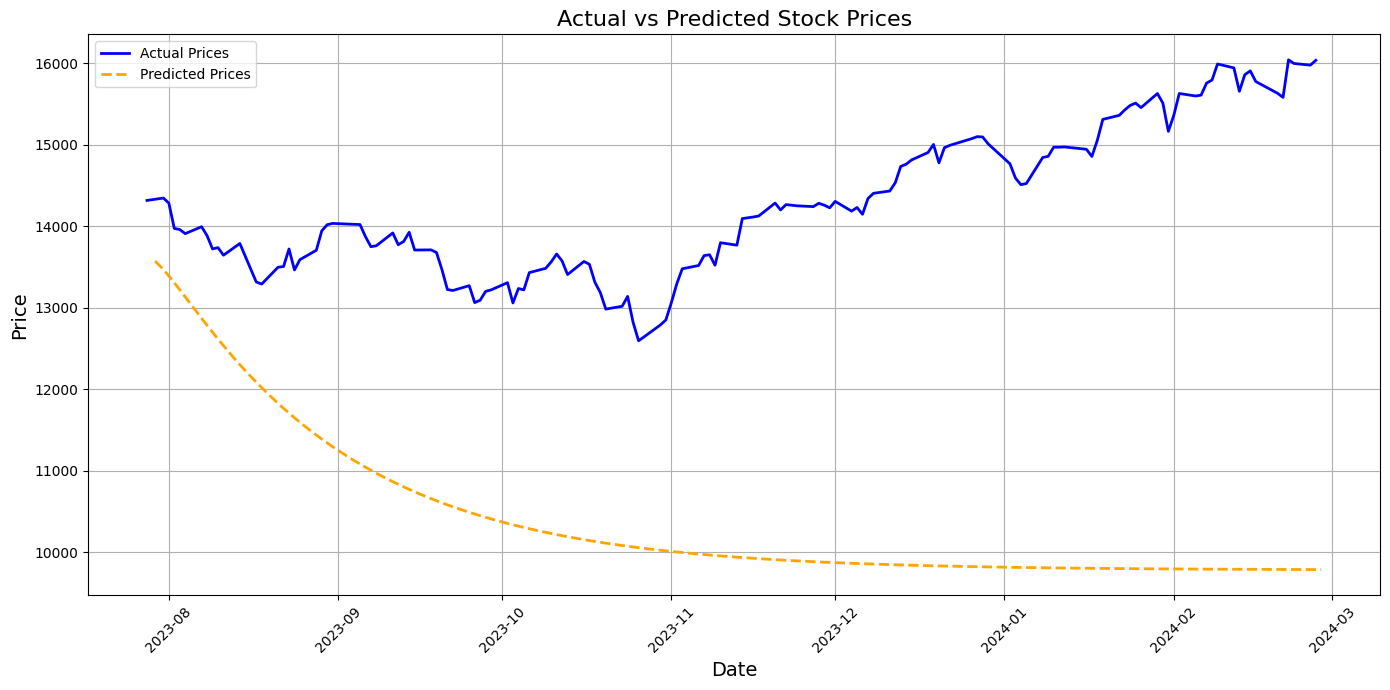

In [62]:
import matplotlib.pyplot as plt

# Plotting the Actual vs. Predicted Prices
plt.figure(figsize=(14, 7))

# Plot Actual Prices
plt.plot(merged_df['Date'], merged_df['Actual Prices'], label='Actual Prices', color='blue', linewidth=2)

# Plot Predicted Prices
plt.plot(merged_df['Date'], merged_df['Predicted Prices'], label='Predicted Prices', color='orange', linestyle='--', linewidth=2)

# Adding titles and labels
plt.title('Actual vs Predicted Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [63]:
actual_price_diff = np.diff(merged_df['Actual Prices'].dropna())
predicted_price_diff = np.diff(merged_df['Predicted Prices'].dropna())

# Convert the differences into binary labels: 1 (Up) and 0 (Down)
actual_labels = (actual_price_diff > 0).astype(int)  # 1 if price goes up, 0 if it goes down
predicted_labels = (predicted_price_diff > 0).astype(int)

# Step 5: Generate Confusion Matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[61  0]
 [85  0]]


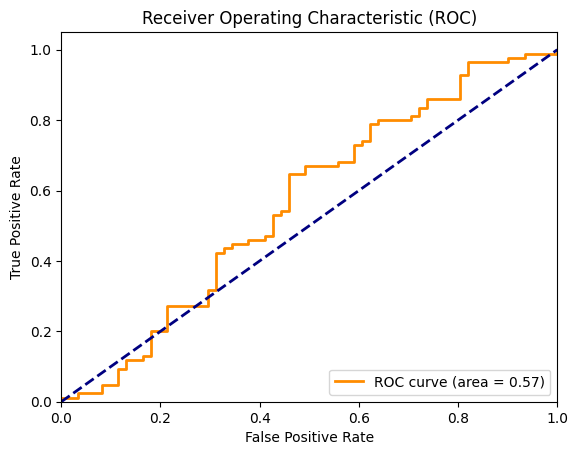

Area Under the Curve (AUC): 0.57


In [64]:

# Step 6: Generate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_price_diff)
roc_auc = roc_auc_score(actual_labels, predicted_price_diff)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC value
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")